#### Analyze training images features extracted by existing algorithm


In [1]:
from cpgan import init_yaml
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# init Path
f_yaml = init_yaml.yaml_f
feature_path = path.join(f_yaml['feature_path'],'features.csv')
df = pd.read_csv(feature_path)

In [2]:
df.head(5)

,name,phi,k,spec_area,eul,psd,tsd
0,1614.npy,0.254422,105.095398,0.071488,53,0.000011,0.000004
1,991.npy,0.207901,106.568034,0.071795,38,0.000011,0.000004
2,12980.npy,0.240058,151.129026,0.075094,13,0.000011,0.000004
3,6012.npy,0.198465,147.565940,0.069263,21,0.000011,0.000004
4,22369.npy,0.235410,116.116557,0.074175,31,0.000011,0.000004


#### Analyze features correlation

                phi         k  spec_area       eul       psd       tsd
phi        1.000000 -0.139355   0.806048 -0.569210 -0.189830 -0.159155
k         -0.139355  1.000000  -0.247484  0.137458  0.264347  0.404574
spec_area  0.806048 -0.247484   1.000000 -0.739394 -0.463219 -0.345920
eul       -0.569210  0.137458  -0.739394  1.000000  0.350577  0.309845
psd       -0.189830  0.264347  -0.463219  0.350577  1.000000  0.672884
tsd       -0.159155  0.404574  -0.345920  0.309845  0.672884  1.000000


[Text(0, -1.0, ''),
 Text(0, 0.0, 'porosity'),
 Text(0, 1.0, 'Permeability'),
 Text(0, 2.0, 'Specfic_Area'),
 Text(0, 3.0, 'Euler_Characteristics'),
 Text(0, 4.0, 'Pore_Size'),
 Text(0, 5.0, 'throat_Size'),
 Text(0, 6.0, '')]

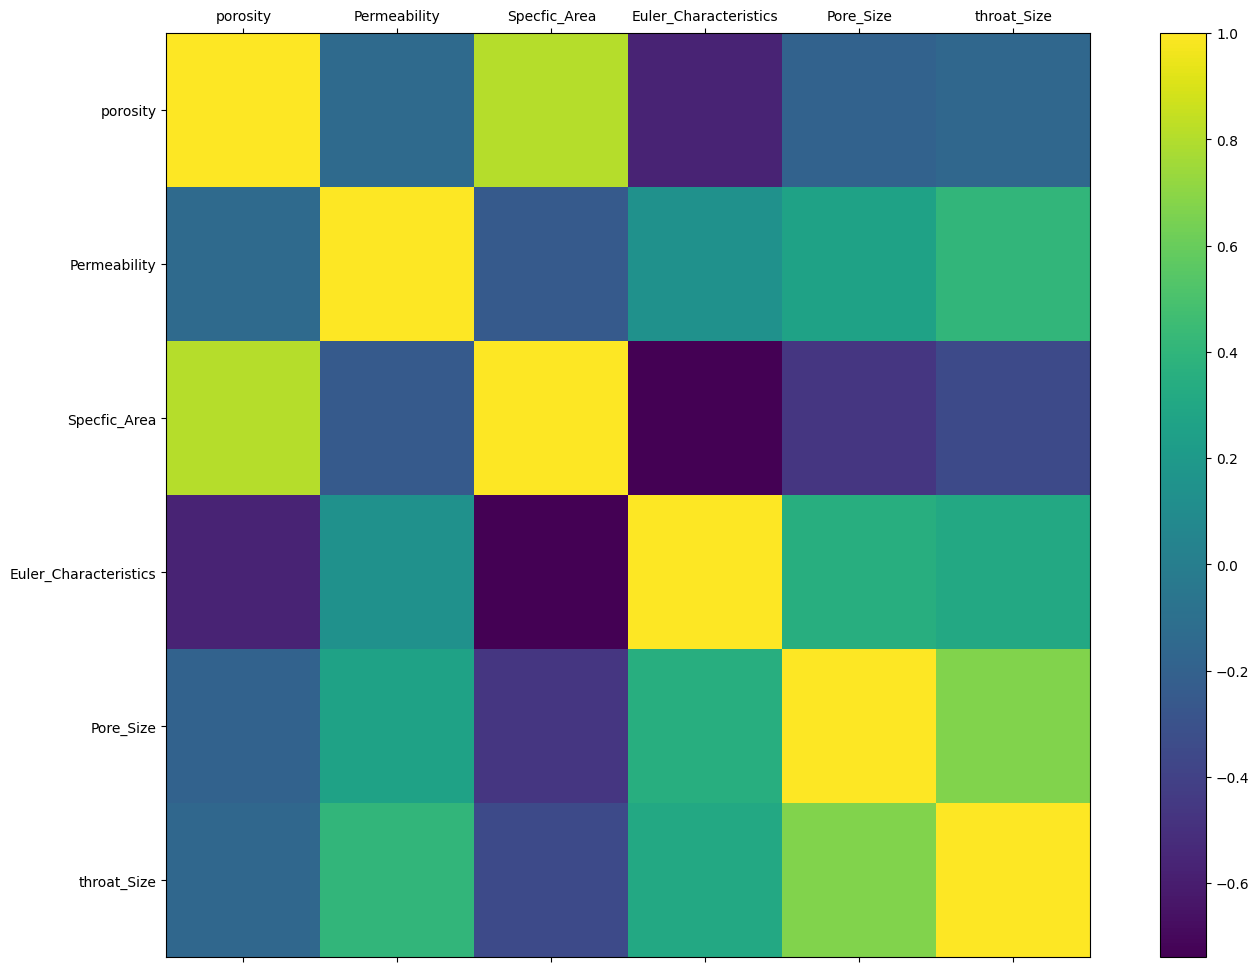

In [3]:
print(df.corr())

columns_list = [
    'porosity',
    'Permeability',
    'Specfic_Area',
    'Euler_Characteristics',
    'Pore_Size',
    'throat_Size'
    ]

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)
ax.set_xticklabels(['']+columns_list)
ax.set_yticklabels(['']+columns_list)

#### Statistics
* Minkowski Functional characterization
* Permeability, throat size, Pore Size

In [4]:
print(df.phi.describe())
print(df.spec_area.describe())
print(df.eul.describe())
print(df.psd.describe())
print(df.tsd.describe())
print(df.k.describe())



count    23839.000000
mean         0.218310
std          0.033881
min          0.073875
25%          0.195588
50%          0.217059
75%          0.239957
max          0.347094
Name: phi, dtype: float64
count    23839.000000
mean         0.072797
std          0.006597
min          0.034346
25%          0.068610
50%          0.072873
75%          0.077034
max          0.100962
Name: spec_area, dtype: float64
count    23839.000000
mean        10.710768
std         26.482771
min       -105.000000
25%         -6.000000
50%         11.000000
75%         28.000000
max        124.000000
Name: eul, dtype: float64
count    2.383900e+04
mean     1.074763e-05
std      4.851854e-07
min      9.023521e-06
25%      1.040999e-05
50%      1.072350e-05
75%      1.106010e-05
max      1.355965e-05
Name: psd, dtype: float64
count    2.383900e+04
mean     4.041835e-06
std      1.562152e-07
min      3.473150e-06
25%      3.934157e-06
50%      4.036652e-06
75%      4.143855e-06
max      4.731783e-06
Name: tsd,

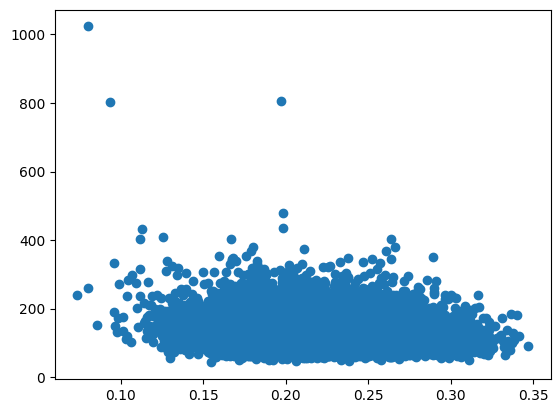

In [6]:
plt.scatter(df['phi'],df['k'])

#### What if we filter the image according to euler characteristics

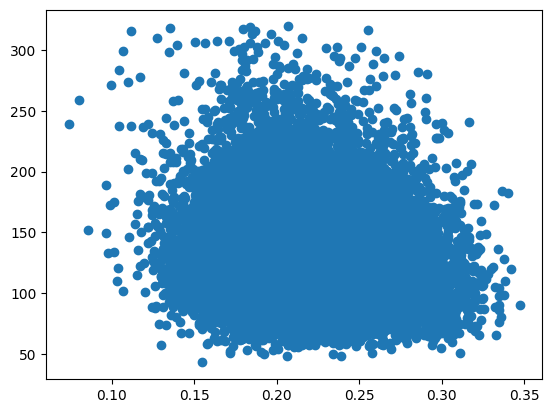

In [8]:
df = df[df['k']<320]
plt.scatter(df['phi'],df['k'])